In [9]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_json('../data/json/final_gensim_database_LDAMallet.json')
df.columns

Index(['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'abstracts',
       'citations', 'email', 'faculty_name', 'google_scholar_link', 'indices',
       'location', 'office', 'page', 'paper_count', 'paper_titles', 'phone',
       'rank', 'rating', 'research_areas', 'score', 'tags', 'title',
       'university_name'],
      dtype='object')

In [12]:
df = pd.read_json('../data/json/final_gensim_database_LDA.json')
df.columns

Index(['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords', 'abstracts',
       'citations', 'email', 'faculty_name', 'google_scholar_link', 'indices',
       'location', 'office', 'page', 'paper_count', 'paper_titles', 'phone',
       'rank', 'rating', 'research_areas', 'score', 'tags', 'title',
       'university_name'],
      dtype='object')

In [13]:
df = pd.read_json('../data/json/final_database.json')
df.columns

Index(['abstracts', 'citations', 'email', 'faculty_name',
       'google_scholar_link', 'indices', 'location', 'office', 'page',
       'paper_count', 'paper_titles', 'phone', 'predicted_cluster_num',
       'predicted_research_areas', 'rank', 'rating', 'research_areas', 'score',
       'tags', 'title', 'university_name'],
      dtype='object')

In [14]:
df = pd.read_json('../data/json/final_topic_database.json')
df.columns

Index(['abstracts', 'citations', 'email', 'faculty_name',
       'google_scholar_link', 'indices', 'location', 'office', 'page',
       'paper_count', 'paper_titles', 'phone', 'predicted_research_areas',
       'predicted_topic_num', 'rank', 'rating', 'research_areas', 'score',
       'tags', 'title', 'university_name'],
      dtype='object')

In [16]:
df.head()

,Dominant_Topic,Perc_Contribution,Topic_Keywords,abstracts,citations,email,faculty_name,google_scholar_link,indices,location,...,paper_count,paper_titles,phone,rank,rating,research_areas,score,tags,title,university_name
0,2,0.5504,"rock, measurements, properties, permeability, ...",Clastic rocks with variable grain sizes exhi...,"{'All': '5218', 'Since 2013': '2863', '1995': ...",cverdin@austin.utexas.edu,Carlos Torres-Verdin,https://scholar.google.com/citations?user=I-J9...,"{'h-index': {'All': '34', 'Since 2013': '23'},...","Austin, TX",...,100,INTERPRETATION OF BOREHOLE SONIC MEASUREMENTS...,"(512) 471-4216, (512) 471-3161",1,3.1,"[Static and Dynamic Formation Evaluation, Bore...",4.7,"[ Amazing lectures (3), BEWARE OF POP QUIZZES...",Professor,University of Texas--Austin (Cockrell)
1,11,0.3808,"oil, recovery, surfactant, water, foam, model,...",This paper presents an alternative method of ...,"{'All': '3308', 'Since 2013': '1489', '1992': ...",dicarlo@mail.utexas.edu,David DiCarlo,https://scholar.google.com/citations?user=OFIv...,"{'h-index': {'All': '30', 'Since 2013': '21'},...","Austin, TX",...,100,Replicating carbonaceous vug in synthetic por...,(512) 471-1283,1,3.5,"[Chemical EOR, Gas Enhanced Oil Recovery, Geol...",4.7,"[ Tough Grader (2), TEST HEAVY (1), LOTS OF ...",Associate Professor,University of Texas--Austin (Cockrell)
10,11,0.7269,"oil, recovery, surfactant, water, foam, model,...",Numerous studies based on static imbibition e...,"{'All': '5930', 'Since 2013': '3336', '1986': ...",mohanty@mail.utexas.edu,Kishore Mohanty,https://scholar.google.com/citations?user=Eocb...,"{'h-index': {'All': '43', 'Since 2013': '32'},...","Austin, TX",...,100,Dynamic surfactant-aided imbibition in fractu...,(512) 471-3077,1,,"[Chemical EOR, Gas Enhanced Oil Recovery, Hydr...",4.7,[],Professor,University of Texas--Austin (Cockrell)
11,1,0.4090,"reservoir, data, model, pressure, approach, fl...",Several tools and techniques exist to underst...,"{'All': '13066', 'Since 2013': '5639', '1986':...",larry_lake@mail.utexas.edu,Larry Lake,https://scholar.google.com/citations?user=eGlU...,"{'h-index': {'All': '58', 'Since 2013': '34'},...","Austin, TX",...,94,Extension of Capacitance/Resistance Model to ...,"(512) 471-8233, (512) 471-3161",1,2.4,[Fundamental Processes; Integrated Reservoir C...,4.7,"[ ACCESSIBLE OUTSIDE CLASS (1), Inspirational...",Professor,University of Texas--Austin (Cockrell)
12,0,0.3105,"flow, phase, method, simulation, behavior, num...","In this paper, we propose an enriched Galerk...","{'All': '19220', 'Since 2013': '7838', '1982':...",mfw@ices.utexas.edu,Mary Wheeler,https://scholar.google.com/citations?user=sX58...,"{'h-index': {'All': '66', 'Since 2013': '45'},...","Austin, TX",...,100,Mixed Formulation of a Linearized Lubrication...,(512) 475-8625,1,,"[Drilling, Well Completions, and Rock Mechanic...",4.7,[],Professor,University of Texas--Austin (Cockrell)


In [17]:
sum(df['rating'] == "") # 63 ratings missing out of 88

63

In [18]:
(df[df['rating'] != ""]['rating'].apply(lambda x: int(x))).median()

3.0

# Ranking algorithm based on university rank, number of papers in database, text-similarity,  and h_index

In [21]:
from cleaning import database_cleaner

In [24]:
df = database_cleaner('../data/json/majors_database.json')
df.head()

,university_name,location,rank,score,citations,email,google_scholar_link,indices,office,page,phone,rating,research_areas,tags,title,faculty_name,paper_titles,abstracts,paper_count,h_index
0,University of Texas--Austin (Cockrell),"Austin, TX",1,4.7,"{'All': '5218', 'Since 2013': '2863', '1995': ...",cverdin@austin.utexas.edu,https://scholar.google.com/citations?user=I-J9...,"{'h-index': {'All': '34', 'Since 2013': '23'},...",CPE 5.182A,https://www.pge.utexas.edu/facultystaff/profil...,"(512) 471-4216, (512) 471-3161",3.1,"[Static and Dynamic Formation Evaluation, Bore...","[ Amazing lectures (3), BEWARE OF POP QUIZZES...",Professor,Carlos Torres-Verdin,INTERPRETATION OF BOREHOLE SONIC MEASUREMENTS...,Clastic rocks with variable grain sizes exhi...,100,34
1,University of Texas--Austin (Cockrell),"Austin, TX",1,4.7,"{'All': '3308', 'Since 2013': '1489', '1992': ...",dicarlo@mail.utexas.edu,https://scholar.google.com/citations?user=OFIv...,"{'h-index': {'All': '30', 'Since 2013': '21'},...",CPE 4.174,https://www.pge.utexas.edu/facultystaff/profil...,(512) 471-1283,3.5,"[Chemical EOR, Gas Enhanced Oil Recovery, Geol...","[ Tough Grader (2), TEST HEAVY (1), LOTS OF ...",Associate Professor,David DiCarlo,Replicating carbonaceous vug in synthetic por...,This paper presents an alternative method of ...,100,30
2,University of Texas--Austin (Cockrell),"Austin, TX",1,4.7,"{'All': '3255', 'Since 2013': '1697', '1990': ...",vanoort@austin.utexas.edu,https://scholar.google.com/citations?user=r7In...,"{'h-index': {'All': '27', 'Since 2013': '18'},...",CPE 5.186A,https://www.pge.utexas.edu/facultystaff/profil...,(512) 471-6262,,"[Drilling, Well Completions, and Rock Mechanic...",[],Professor,Eric van Oort,Thermal wellbore strengthening through manage...,This paper is the first part of a two-part se...,99,27
3,University of Texas--Austin (Cockrell),"Austin, TX",1,4.7,"{'All': '15200', 'Since 2013': '7251', '1981':...",gpope@mail.utexas.edu,https://scholar.google.com/citations?user=OZRK...,"{'h-index': {'All': '63', 'Since 2013': '43'},...",CPE 2.502,https://www.pge.utexas.edu/facultystaff/profil...,"(512) 471-3235, (512) 471-3161",,[Environmental Engineering; Natural Gas Engine...,[],Professor,Gary Pope,Apparatus and Method for Potable Water Extrac...,Unstable displacement and the resulting vis...,100,63
4,University of Texas--Austin (Cockrell),"Austin, TX",1,4.7,"{'All': '732', 'Since 2013': '678', '2010': '3...",daigle@austin.utexas.edu,https://scholar.google.com/citations?user=XitK...,"{'h-index': {'All': '16', 'Since 2013': '16'},...",CPE 5.174,https://www.pge.utexas.edu/facultystaff/profil...,(512) 471-3775,,"[Drilling, Well Completions, and Rock Mechanic...",[],Assistant Professor,Hugh Daigle,Burial-driven methane recycling in marine gas...,Natural gas hydrate may be buried with sedime...,100,16


In [32]:
l = df["research_areas"][0]

In [36]:
df["research_areas"] = df['research_areas'].apply(lambda x: " ".join(x))

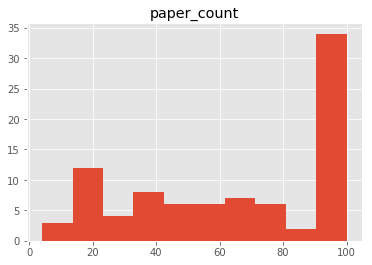

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
df.hist(column="paper_count")
plt.show()

In [47]:
sum(df["paper_count"] < 20)

10